In [277]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Pré-processamento #

### Base e encoder manual ###

In [278]:
df = pd.read_csv(
    '../data/heart/processed/heart.csv',
    sep = ';', encoding = 'utf-8'
)

In [279]:
warnings.filterwarnings("ignore")

In [280]:
df_encod_manual = pd.DataFrame.copy(df)

In [281]:
df_encod_manual['Sex'].replace({
    'M': 0,
    'F': 1
}, inplace = True)

df_encod_manual['ChestPainType'].replace({
    'TA': 0,
    'ATA': 1,
    'NAP': 2,
    'ASY': 3
}, inplace = True)

df_encod_manual['RestingECG'].replace({
    'Normal': 0,
    'ST': 1,
    'LVH': 2
}, inplace = True)

df_encod_manual['ExerciseAngina'].replace({
    'N': 0,
    'Y': 1
}, inplace = True)

df_encod_manual['ST_Slope'].replace({
    'Up': 0,
    'Flat': 1,
    'Down': 2
}, inplace = True)

### Separação da base em previsores e classe alvo ###

In [282]:
previsores = df_encod_manual.iloc[:, 0:11].values

In [283]:
alvo = df_encod_manual.iloc[:, 11].values

### Escalonamento ###

In [284]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [285]:
previsores_df = pd.DataFrame(previsores_esc)

#### LabelEncoder ####

In [286]:
previsores_label = df.iloc[:, 0:11].values

In [287]:
previsores_label[:, 1] = LabelEncoder().fit_transform(previsores[:, 1])

In [288]:
previsores_label[:, 2] = LabelEncoder().fit_transform(previsores_label[:, 2])
previsores_label[:, 6] = LabelEncoder().fit_transform(previsores_label[:, 6])
previsores_label[:, 8] = LabelEncoder().fit_transform(previsores_label[:, 8])
previsores_label[:, 10] = LabelEncoder().fit_transform(previsores_label[:, 10])

#### OneHotEncoder ####

In [289]:
previsores_hot = ColumnTransformer(
    transformers = [('OneHot', OneHotEncoder(), [1, 2, 6, 8, 10])],
    remainder = 'passthrough'
).fit_transform(previsores_label)

In [290]:
previsores_hot_df = pd.DataFrame(previsores_hot)

#### OneHot + Escalonamento ####

In [291]:
previsoresHot_esc = StandardScaler().fit_transform(previsores_hot)

In [292]:
previsoresHot_esc_df = pd.DataFrame(previsoresHot_esc)

## Separação dos dados em treino e teste ##
<span style="font-size: small;"> 
- <strong>arrays:</strong> nomes dos atributos previsores e alvo.</br>
- <strong>test_size:</strong> tamanho em porcentagem dos dados de teste. default é none. </br> 
- <strong>train_size:</strong> tamanho em porcentagem dos dados de treinamento.default é none. </br>  
- <strong>random_state:</strong> nomeação de um estado aleatório. </br>
- <strong>shuffle:</strong> embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True. </br>
- <strong>stratify:</strong> Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção). </span>

In [672]:
x_train, x_test, y_train, y_test = train_test_split(
    previsores, alvo,
    test_size = 0.3, random_state = 0
)

# Previsores #
<span style="font-size: 13px;">
<li> <strong>previsores</strong> -> Atributos codificados manualmente sem escalonamento.</li></br>
<li> <strong>previsoresHot_esc</strong> -> Atributos codificados com LabelEncoder e OneHotEncoder e escalonados.</li></br>
<li> <strong>previsores_esc</strong> -> Atributos codificados manualmente e escalonados.</li></br>
<li> <strong>previsores_hot</strong> -> Atributos codificados com OneHotEncoder sem escalonamento.</li></br>
<li> <strong>previsores_label</strong> -> Atributos codificados com LabelEncoder e sem escalonamento. </li></br>
</span>

# Random Forest #
<span style="font-size: 12.5px;">


**Árvores de Decisão** </br>
Uma árvore de decisão é uma estrutura em forma de árvore onde cada nó representa uma característica, cada ramo representa uma decisão baseada nessa característica e cada folha representa um resultado.

**Construção do Random Forest** </br>
- **Bootstrap Aggregating (Bagging):** O Random Forest cria uma coleção de árvores de decisão, sendo cada árvore construída de forma independente e aleatória através do bagging, que consiste na seleção aleatória de amostras de treinamento com substituição.
- **Aleatoriedade nas Divisões de Características:** Durante a construção de cada árvore, em cada nó, um subconjunto aleatório de características é selecionado para divisão, adicionando diversidade às árvores.


- **Importância das Características:** Uma medida comum da importância das características é a diminuição média da impureza causada pela divisão dessa característica em todas as árvores do Random Forest.

$
\text{Entropia}(D) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$

$ 
Gini(D) = 1 - \sum_{i=1}^{k} (p_i)^2 
$

$
\text{Ganho}(D, \text{feature}) = \text{Entropia}(D) - \sum_{j} \frac{|D_j|}{|D|} \text{Entropia}(D_j)
$

**Parâmetros** </br>
Alguns parâmetros importantes a serem considerados ao utilizar o Random Forest incluem:
- <strong>Número de Árvores:</strong> Determina o número de árvores na floresta.
- <strong>Profundidade Máxima das Árvores:</strong>  Controla a profundidade máxima das árvores individuais.
- <strong>Número Mínimo de Amostras por Folha:</strong>  Define o número mínimo de amostras necessárias em uma folha para dividir um nó.
- <strong>Número Mínimo de Amostras por Divisão:</strong>  Define o número mínimo de amostras necessárias em um nó para ser considerado para divisão.
- <strong>Número de Características a Considerar:</strong>  Determina o número de características a serem consideradas em cada divisão.


**Vantagens** </br>
- Alta Precisão: O Random Forest geralmente produz modelos com alta precisão.
- Tolerância a Overfitting: A aleatoriedade introduzida na construção da floresta ajuda a reduzir o overfitting.
- Lida Bem com Dados Faltantes e Categóricos: O Random Forest pode lidar diretamente com dados faltantes e categóricos sem a necessidade de pré-processamento adicional.

**Desvantagens** </br>
- Mais Lento para Treinar: Em comparação com modelos mais simples, o treinamento de um Random Forest pode ser mais demorado devido à construção de múltiplas árvores.
- Difícil de Interpretar: Como uma floresta consiste em várias árvores individuais, pode ser difícil interpretar o modelo resultante.

**Conclusão** </br>
O algoritmo Random Forest é uma ferramenta poderosa para uma variedade de problemas de aprendizado de máquina, oferecendo alta precisão e tolerância a overfitting. No entanto, é importante considerar os parâmetros adequados e estar ciente das suas vantagens e desvantagens ao usá-lo em um contexto específico.

</span>

In [683]:
random = RandomForestClassifier(
    n_estimators = 140, criterion = 'entropy',
    random_state = 5, max_depth = 4
)
random.fit(x_train, y_train);

In [684]:
previsoes_test = random.predict(x_test)

In [685]:
previsoes_train = random.predict(x_train)

## Métricas ##

**Dados de Teste**

In [686]:
acuracia_test = accuracy_score(y_test, previsoes_test) * 100.0
print("Acurácia: %.2f%%" % acuracia_test)

Acurácia: 85.87%


In [687]:
print(confusion_matrix(y_test, previsoes_test))

[[103  18]
 [ 21 134]]


In [688]:
print(classification_report(y_test, previsoes_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       121
           1       0.88      0.86      0.87       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



**Dados de Treino**

In [689]:
acuracia_train = accuracy_score(y_train, previsoes_train) * 100.0
print("Acurácia: %.2f%%" % acuracia_train)

Acurácia: 88.77%


In [690]:
print(confusion_matrix(y_train, previsoes_train))

[[242  47]
 [ 25 327]]


In [691]:
print(classification_report(y_train, previsoes_train))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       289
           1       0.87      0.93      0.90       352

    accuracy                           0.89       641
   macro avg       0.89      0.88      0.89       641
weighted avg       0.89      0.89      0.89       641



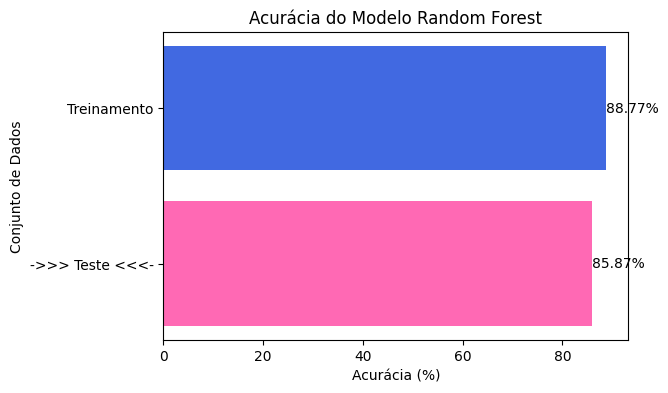

In [692]:
conjunto_dados = ['->>> Teste <<<-', 'Treinamento']

acuracia_test_arredondada = np.round(acuracia_test, 2)
acuracia_train_arredondada = np.round(acuracia_train, 2)
acuracias = [acuracia_test_arredondada, acuracia_train_arredondada]
plt.figure(figsize=(6, 4))


plt.barh(conjunto_dados, acuracias, color=['hotpink', 'royalblue'])


for index, value in enumerate(acuracias):
    plt.text(value, index, f'{value}%', va='center', fontsize=10)


plt.title('Acurácia do Modelo Random Forest')
plt.xlabel('Acurácia (%)')
plt.ylabel('Conjunto de Dados')

plt.show()

### Cross Validation ###

In [693]:
kflod = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [694]:
modelo = RandomForestClassifier(
    n_estimators = 140, criterion = 'entropy',
    random_state = 5, max_depth = 4
)
resultado = cross_val_score(modelo, previsores, alvo, cv = kflod)

In [695]:
print("Acurácia média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia média: 85.81%
